In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats

In [2]:
startup=pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\assignment 5\\50_Startups.csv")

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#there r coorelation between adminstration & marketing so i  deleted Adminstration

In [10]:
startup1=startup.drop(['Administration'], axis = True)

In [11]:
startup1.corr()

,R&D Spend,Marketing Spend,Profit
R&D Spend,1.000000,0.724248,0.972900
Marketing Spend,0.724248,1.000000,0.747766
Profit,0.972900,0.747766,1.000000


In [12]:
startup1.columns

Index(['R&D Spend', 'Marketing Spend', 'State', 'Profit'], dtype='object')

there is space between  R&D spend and Marketing Spend 

In [13]:
startup1.rename(columns={'R&D Spend':'RandDSpend','Marketing Spend':'MarketingSpend'},inplace=True)

In [14]:
startup1.columns

Index(['RandDSpend', 'MarketingSpend', 'State', 'Profit'], dtype='object')

# Performing onehotencoding
 transforming  catrgorical data into onehotencoding

In [15]:
dummys=pd.get_dummies(startup1.State)
dummys

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [16]:
merged = pd.concat([startup1,dummys],axis='columns')

In [17]:
merged

,RandDSpend,MarketingSpend,State,Profit,California,Florida,New York
0,165349.20,471784.10,New York,192261.83,0,0,1
1,162597.70,443898.53,California,191792.06,1,0,0
2,153441.51,407934.54,Florida,191050.39,0,1,0
3,144372.41,383199.62,New York,182901.99,0,0,1
4,142107.34,366168.42,Florida,166187.94,0,1,0
5,131876.90,362861.36,New York,156991.12,0,0,1
6,134615.46,127716.82,California,156122.51,1,0,0
7,130298.13,323876.68,Florida,155752.60,0,1,0
8,120542.52,311613.29,New York,152211.77,0,0,1
9,123334.88,304981.62,California,149759.96,1,0,0


In [18]:
startup_new=merged.drop(['State','Florida','New York'],axis='columns')


In [19]:
startup_new

,RandDSpend,MarketingSpend,Profit,California
0,165349.20,471784.10,192261.83,0
1,162597.70,443898.53,191792.06,1
2,153441.51,407934.54,191050.39,0
3,144372.41,383199.62,182901.99,0
4,142107.34,366168.42,166187.94,0
5,131876.90,362861.36,156991.12,0
6,134615.46,127716.82,156122.51,1
7,130298.13,323876.68,155752.60,0
8,120542.52,311613.29,152211.77,0
9,123334.88,304981.62,149759.96,1


In [20]:
startup_new.rename(columns={'California':'State'},inplace=True)

In [21]:
startup_new

,RandDSpend,MarketingSpend,Profit,State
0,165349.20,471784.10,192261.83,0
1,162597.70,443898.53,191792.06,1
2,153441.51,407934.54,191050.39,0
3,144372.41,383199.62,182901.99,0
4,142107.34,366168.42,166187.94,0
5,131876.90,362861.36,156991.12,0
6,134615.46,127716.82,156122.51,1
7,130298.13,323876.68,155752.60,0
8,120542.52,311613.29,152211.77,0
9,123334.88,304981.62,149759.96,1


# detecting outliers

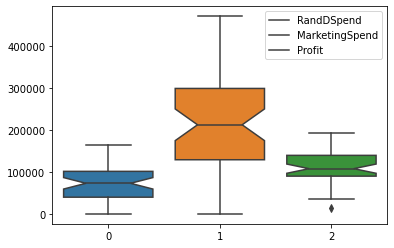

In [22]:
sns.boxplot(data=[startup_new['RandDSpend'],startup_new['MarketingSpend'],startup_new['Profit']],notch=True)
plt.legend(['RandDSpend','MarketingSpend','Profit'])

In [23]:
q1=startup_new.Profit.quantile(0.25)
q3=startup_new.Profit.quantile(0.75)
q1 ,q3

(90138.9025, 139765.97749999998)

In [24]:
IQR = q3-q1
IQR

49627.07499999998

In [25]:
lowerlimit=q1-1.5*(IQR)
upperlimit=q3+1.5*(IQR)
lowerlimit ,upperlimit

(15698.290000000023, 214206.58999999997)

In [26]:
startup_new[(startup_new.Profit<lowerlimit)|(startup_new.Profit>upperlimit)]

,RandDSpend,MarketingSpend,Profit,State
49,0.0,45173.06,14681.4,1


In [27]:
startup_new.drop(startup_new[ (startup_new.Profit > upperlimit) | (startup_new.Profit < lowerlimit) ].index , inplace=True)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
startup_new1 = scaler.fit_transform(startup_new.iloc[:,:])


In [29]:
startup_new1

array([[ 2.01832469e+00,  2.14611996e+00,  2.07155597e+00,
        -6.96310624e-01],
       [ 1.95670428e+00,  1.91359564e+00,  2.05912153e+00,
         1.43614066e+00],
       [ 1.75164950e+00,  1.61370926e+00,  2.03949011e+00,
        -6.96310624e-01],
       [ 1.54854512e+00,  1.40745668e+00,  1.82380835e+00,
        -6.96310624e-01],
       [ 1.49781841e+00,  1.26544171e+00,  1.38140055e+00,
        -6.96310624e-01],
       [ 1.26870558e+00,  1.23786573e+00,  1.13796794e+00,
        -6.96310624e-01],
       [ 1.33003620e+00, -7.22891254e-01,  1.11497651e+00,
         1.43614066e+00],
       [ 1.23334870e+00,  9.12791275e-01,  1.10518529e+00,
        -6.96310624e-01],
       [ 1.01486978e+00,  8.10532777e-01,  1.01146229e+00,
        -6.96310624e-01],
       [ 1.07740527e+00,  7.55234477e-01,  9.46564805e-01,
         1.43614066e+00],
       [ 5.97659604e-01,  1.23002453e-01,  8.50269533e-01,
        -6.96310624e-01],
       [ 5.69864464e-01,  2.94639173e-01,  8.00969295e-01,
      

In [30]:
startup_new.shape

(49, 4)

In [31]:
startup_new.isnull().sum()

RandDSpend        0
MarketingSpend    0
Profit            0
State             0
dtype: int64

In [32]:
startup_new.skew()

RandDSpend        0.166914
MarketingSpend   -0.080504
Profit            0.225195
State             0.763401
dtype: float64

In [33]:
startup_new.kurtosis()

RandDSpend       -0.730525
MarketingSpend   -0.598297
Profit           -0.283295
State            -1.479354
dtype: float64

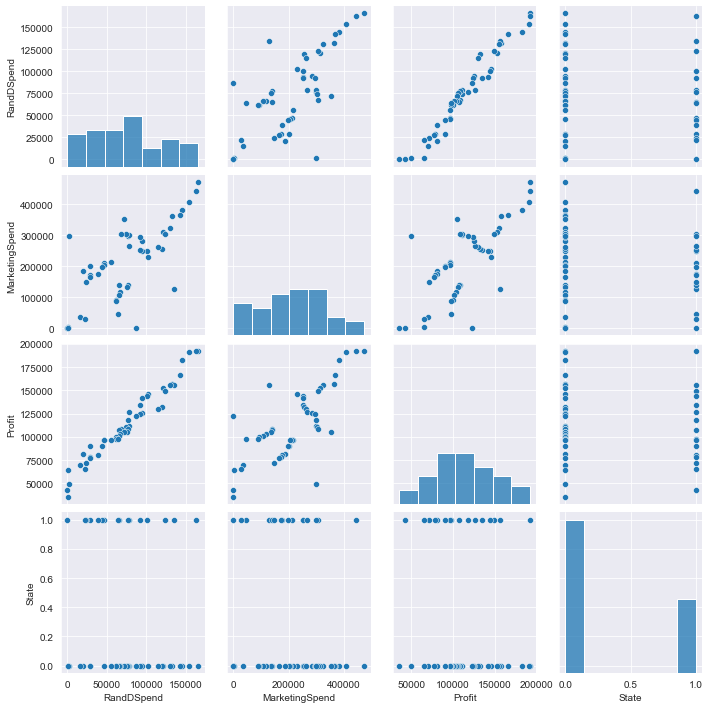

In [34]:
sns.set_style(style='darkgrid')
sns.pairplot(startup_new)

In [35]:
startup_new.corr()

,RandDSpend,MarketingSpend,Profit,State
RandDSpend,1.000000,0.711654,0.978437,-0.101788
MarketingSpend,0.711654,1.000000,0.739307,-0.135188
Profit,0.978437,0.739307,1.000000,-0.083258
State,-0.101788,-0.135188,-0.083258,1.000000


# Preparing for model 

In [36]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RandDSpend+MarketingSpend+State',data=startup_new).fit()

In [37]:
model.params

Intercept         48994.315771
RandDSpend            0.775596
MarketingSpend        0.028335
State              1789.247098
dtype: float64

In [38]:
print(model.tvalues, '\n', model.pvalues)

Intercept         19.015592
RandDSpend        22.036539
MarketingSpend     2.153546
State              0.752980
dtype: float64 
 Intercept         3.876487e-23
RandDSpend        9.575580e-26
MarketingSpend    3.667043e-02
State             4.553833e-01
dtype: float64


In [39]:
(model.rsquared,model.rsquared_adj)

(0.9615698822380084, 0.959007874387209)

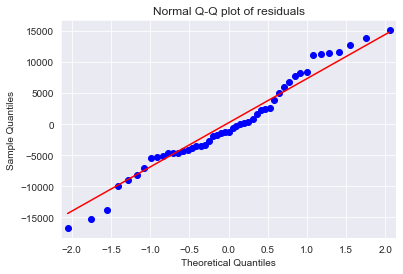

In [40]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [41]:
list(np.where(model.resid>10))

[array([ 0,  1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 30, 34, 35, 36,
        38, 40, 41, 43, 45], dtype=int64)]

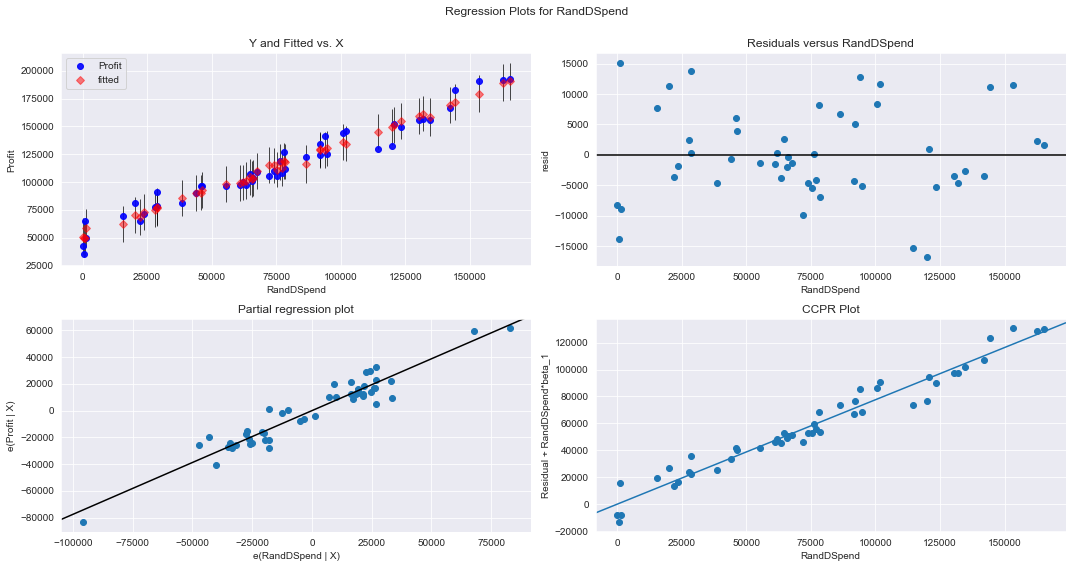

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RandDSpend", fig=fig)
plt.show()

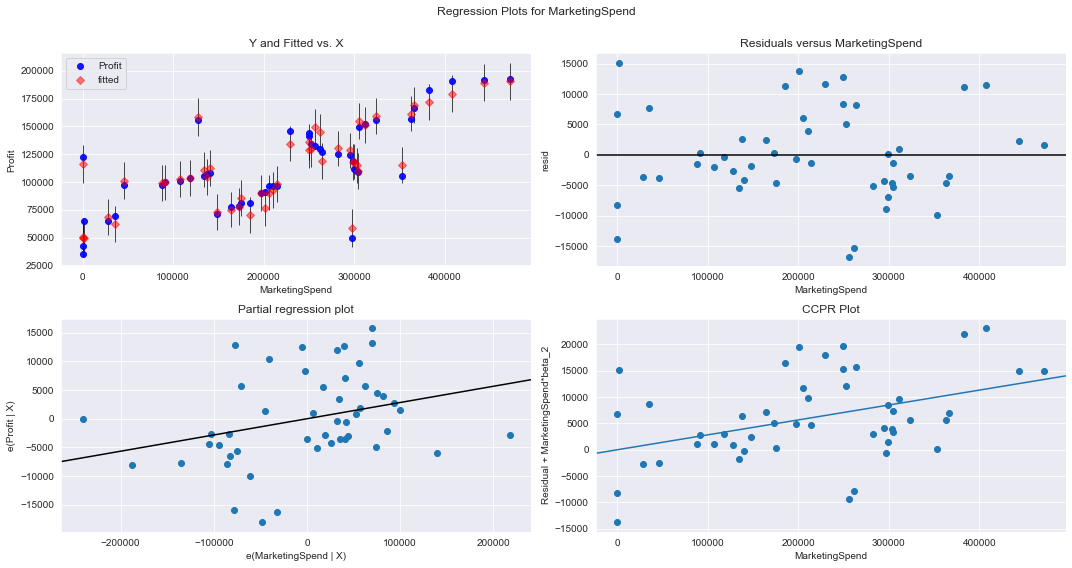

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

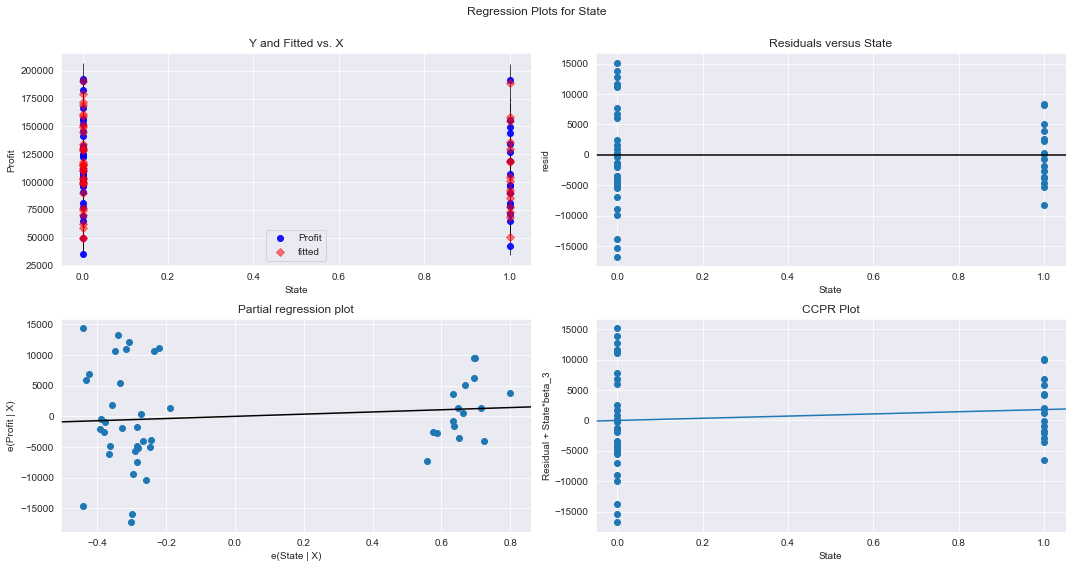

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State", fig=fig)
plt.show()

# prediciting new data point

In [45]:
#New data for prediction

new_data=pd.DataFrame({'RandDSpend':185349.20,"MarketingSpend":500000.10,'State':1},index=[1])

In [46]:
model.predict(new_data)

1    208707.252654
dtype: float64

In [47]:
model.predict(startup_new.iloc[0:3,])

0    190606.576974
1    189471.631650
2    179561.835571
dtype: float64

In [48]:
pred_y = model.predict(startup_new)

In [49]:
pred_y

0     190606.576974
1     189471.631650
2     179561.835571
3     171827.009568
4     169587.649620
5     161559.252117
6     158809.683318
7     159230.130916
8     151316.231736
9     155083.314299
10    134531.014902
11    135940.891272
12    128873.910154
13    129291.797701
14    149290.160460
15    145235.851456
16    118780.504786
17    130416.820319
18    128511.189769
19    116021.118477
20    118388.450897
21    118285.973502
22    114978.792718
23    110007.936734
24    112732.562352
25    104846.453182
26    111217.427198
27    114928.188121
28    103571.368198
29    102913.457375
30     99659.215845
31     98911.136336
32    101269.070376
33     98116.908793
34     92764.415819
35     90505.974321
36     76924.762114
37     90546.893686
38     69933.808085
39     85648.016397
40     77981.490336
41     75288.248615
42     73313.000858
43     62027.365741
44     68787.402554
45     49824.038452
46     58433.335695
47     50783.562870
48     49414.727765
dtype: float64

# toyota corolla price pridiction

In [50]:
df = pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\assignment 5\\ToyotaCorolla.csv",usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])


In [51]:
df.tail()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


In [52]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [54]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [55]:
df.skew()

Price             1.703885
Age_08_04        -0.826702
KM                1.015912
HP                0.955836
cc               27.431793
Doors            -0.076395
Gears             2.283960
Quarterly_Tax     1.993834
Weight            3.108639
dtype: float64

In [56]:
df.kurtosis()

Price              3.737781
Age_08_04         -0.076632
KM                 1.685057
HP                 8.836434
cc               930.711227
Doors             -1.874765
Gears             37.703476
Quarterly_Tax      4.298345
Weight            19.362901
dtype: float64

In [57]:
df.shape

(1436, 9)

In [58]:
df.drop(columns=['Doors'],inplace=True)

In [59]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.014629,0.306996,0.335637
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.020613,0.626134,1.000000


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.iloc[:,:])


In [61]:
df1

array([[ 0.76376268, -1.77196633, -0.57469494, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.83271485, -1.77196633,  0.11745379, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.88787659, -1.71818412, -0.71538641, ..., -0.14042519,
         2.98867967,  1.75856113],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-0.96004167,  0.75579727, -1.37670303, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-1.04278428,  1.0784905 , -1.82784925, ..., -0.14042519,
        -1.65690726,  0.78939926]])

In [62]:
#transforming data into log 

C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc', ylabel='Density'>

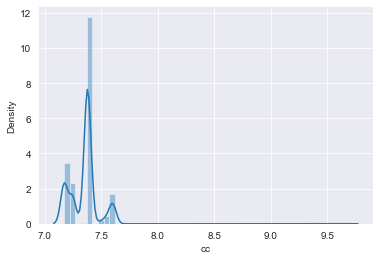

In [63]:
df['cc']=np.log(df['cc']+1)
sns.distplot(df['cc'])

In [64]:
#transforming data into log 

C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

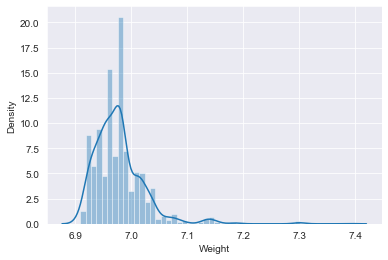

In [65]:
df['Weight']=np.log(df['Weight']+1)
sns.distplot(df['Weight'])

before transforming the data weight skeww is +3 after  using log function skew is decreased 2.44

In [66]:
#using resiprocal transformation to Make data into more normal

C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

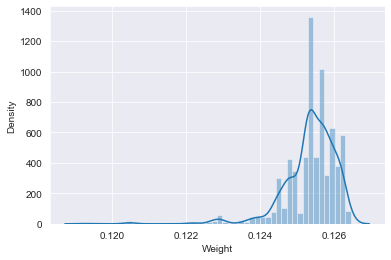

In [67]:
df['Weight']=1/(df['Weight']+1)
sns.distplot(df['Weight'])

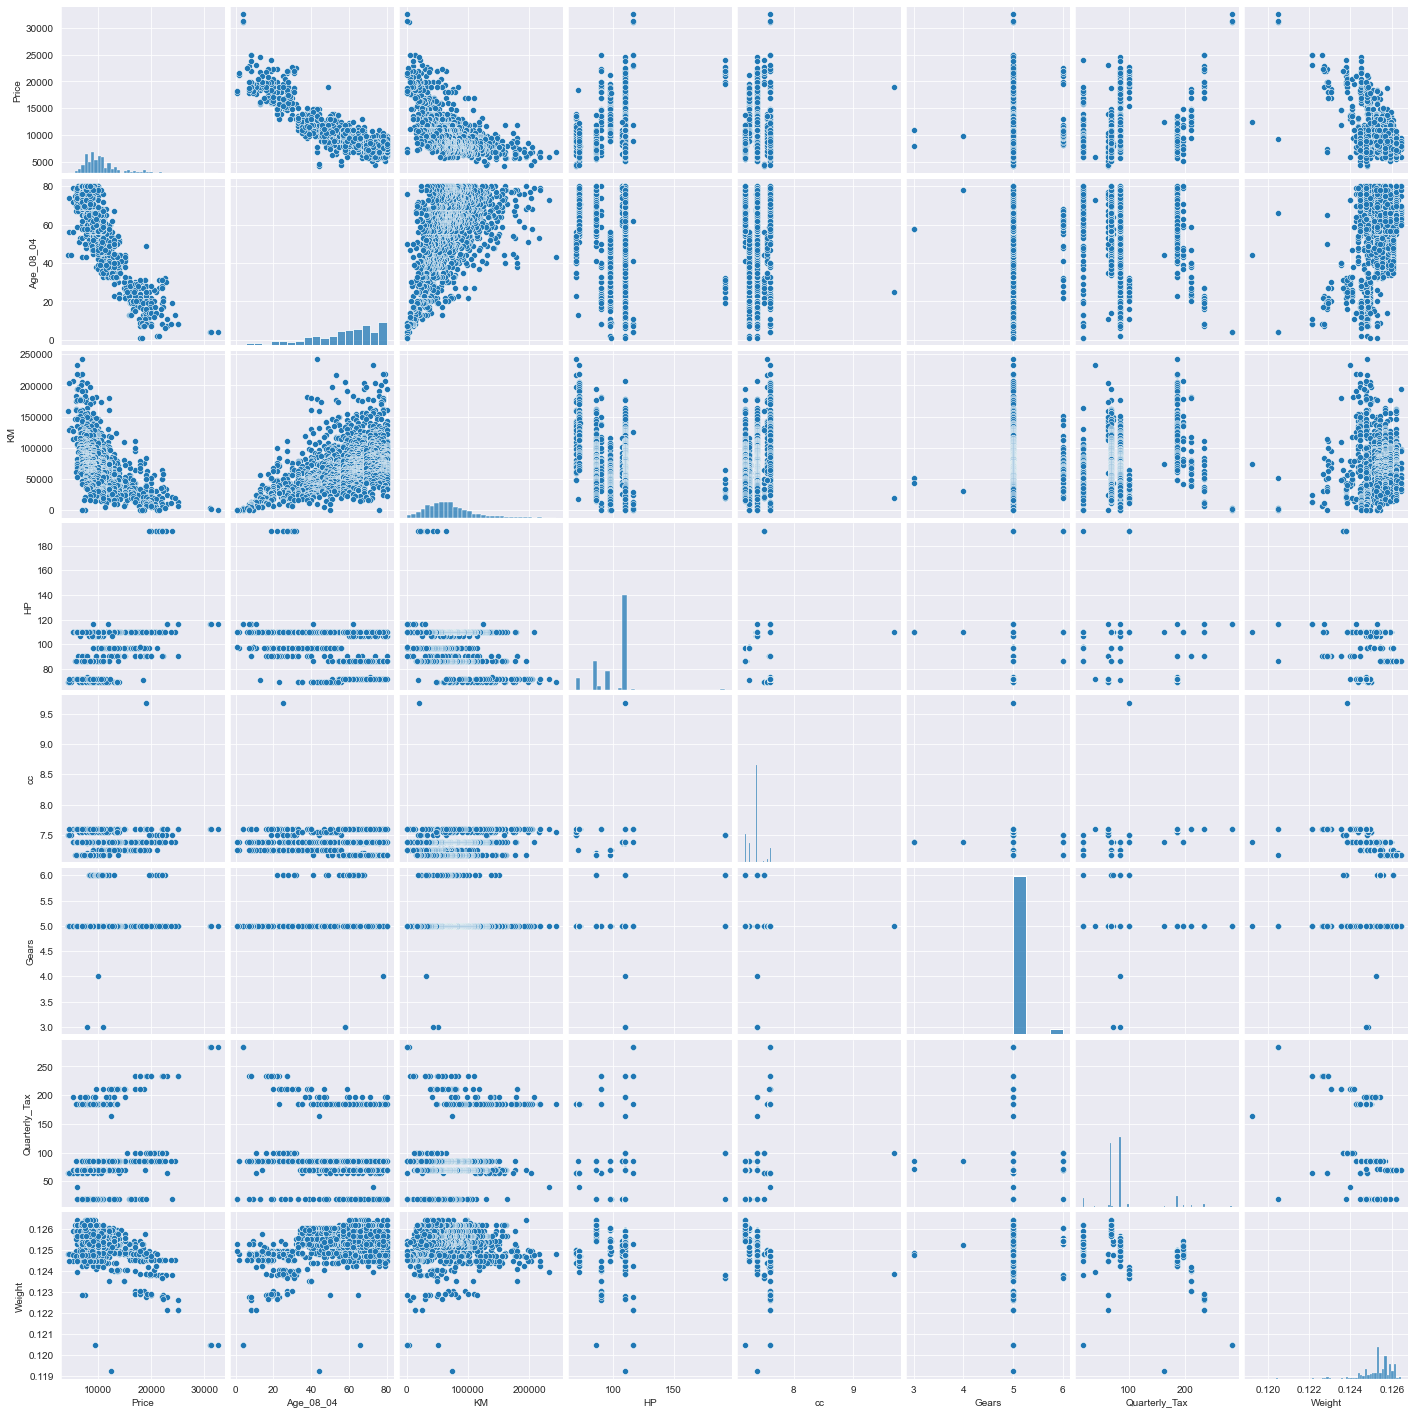

In [68]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

# preparing model

In [69]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Gears+Weight',data=df).fit()

In [70]:
model.params

Intercept    2.290631e+05
Age_08_04   -1.204307e+02
KM          -1.863817e-02
HP           3.004834e+01
cc          -2.012289e+03
Gears        6.231218e+02
Weight      -1.609054e+06
dtype: float64

In [71]:
print(model.tvalues, '\n', model.pvalues)

Intercept    21.076511
Age_08_04   -45.764811
KM          -14.835084
HP           11.440967
cc           -5.551842
Gears         3.241949
Weight      -22.089729
dtype: float64 
 Intercept     4.383569e-86
Age_08_04    2.521906e-282
KM            2.046908e-46
HP            4.601786e-29
cc            3.365308e-08
Gears         1.214531e-03
Weight        2.915463e-93
dtype: float64


In [72]:
(model.rsquared,model.rsquared_adj)

(0.864889304902982, 0.8643220101719938)

# Simple linear regression

In [73]:
ml_v=smf.ols('Price~Age_08_04',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


In [74]:
ml_v=smf.ols('Price~KM',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [75]:
ml_v=smf.ols('Price~HP',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [76]:
ml_v=smf.ols('Price~cc',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept   -4.871503
cc           6.923107
dtype: float64 
 Intercept    1.230375e-06
cc           6.644987e-12
dtype: float64


In [77]:
ml_v=smf.ols('Price~Gears',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64


In [78]:

ml_v=smf.ols('Price~Quarterly_Tax',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept        41.330311
Quarterly_Tax     8.507487
dtype: float64 
 Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64


In [79]:
ml_v=smf.ols('Price~Weight',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    28.154819
Weight      -27.367132
dtype: float64 
 Intercept    3.314950e-139
Weight       5.072688e-133
dtype: float64


# calculating VIF

In [80]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) 

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~KM+Age_08_04+cc+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc~KM+Age_08_04+Gears+Quarterly_Tax+Weight+HP',data=df).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_Gears = smf.ols('Gears~KM+Age_08_04+cc+Quarterly_Tax+Weight+HP',data=df).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)  

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~KM+Age_08_04+cc+Gears+Weight+HP',data=df).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax) 

rsq_Weight = smf.ols('Weight~KM+Age_08_04+cc+Gears+HP+Quarterly_Tax',data=df).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 


# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Gears','Quarterly_Tax',
'Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.934006
1,KM,1.832113
2,HP,1.553432
3,cc,2.051611
4,Gears,1.060308
5,Quarterly_Tax,2.561597
6,Weight,2.744810


# Resudial analysis 

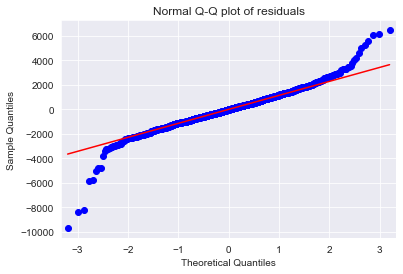

In [81]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [82]:
list(np.where(model.resid>-800))

[array([   6,    7,    8, ..., 1430, 1432, 1433], dtype=int64)]

# ## Residual Plot for Homoscedasticity

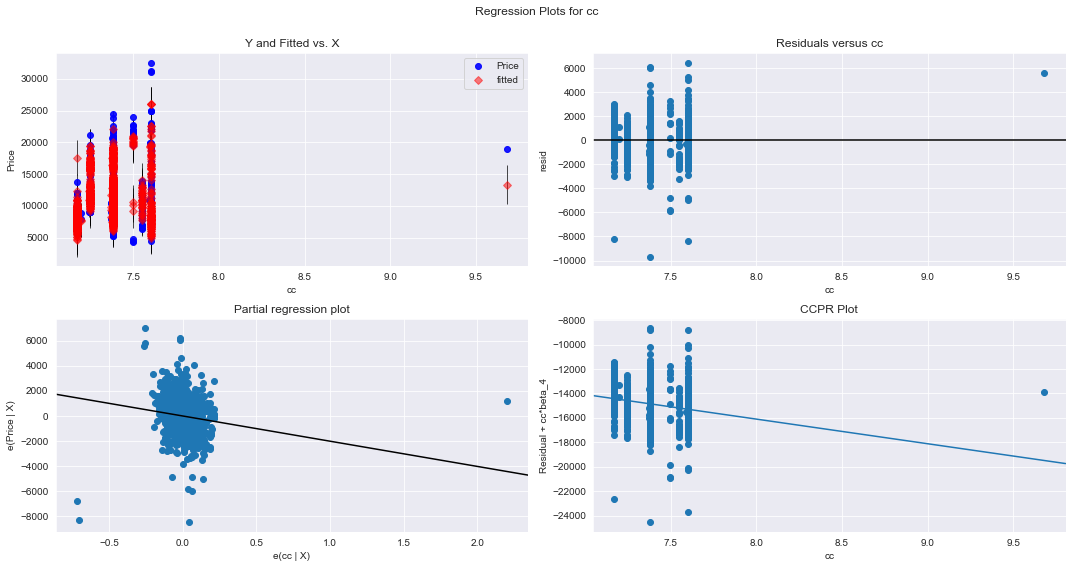

In [83]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

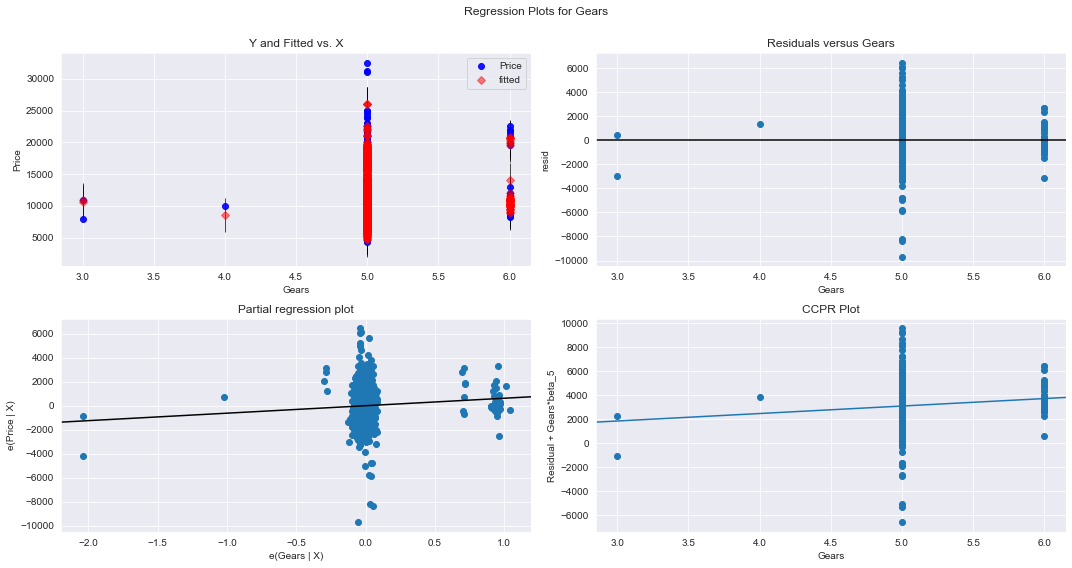

In [84]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

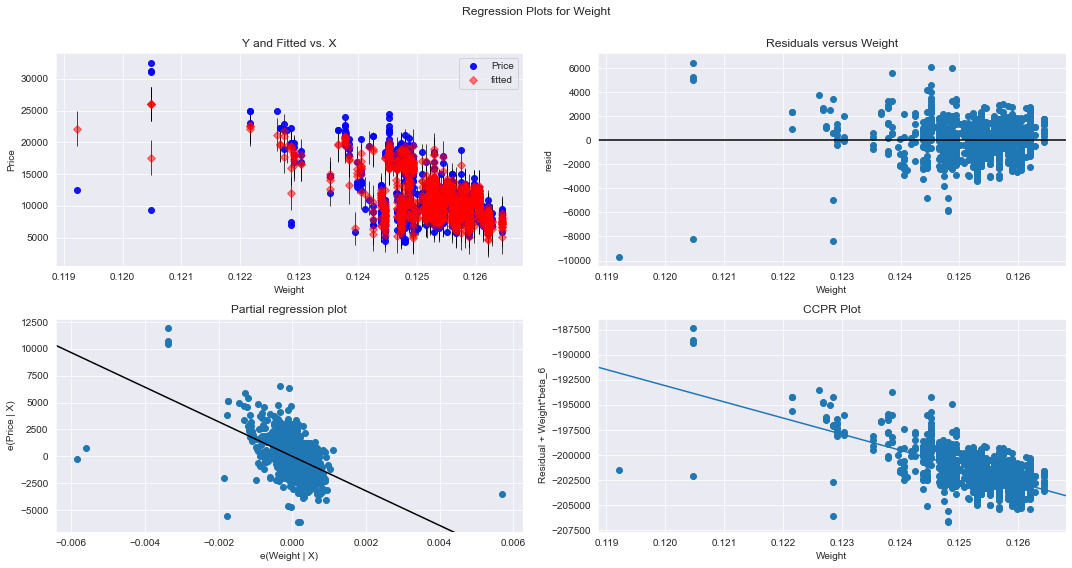

In [85]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

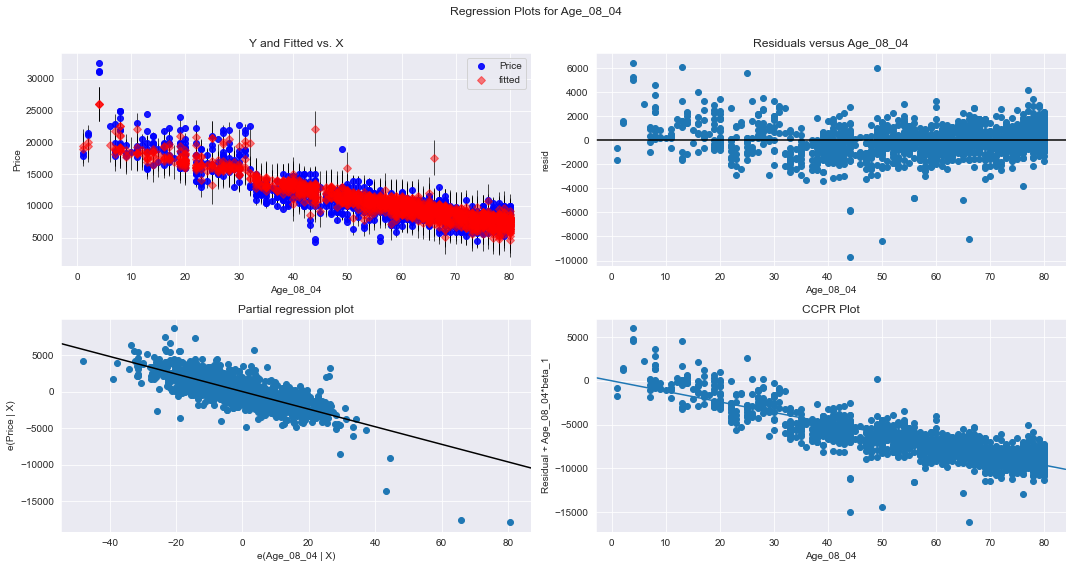

In [86]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

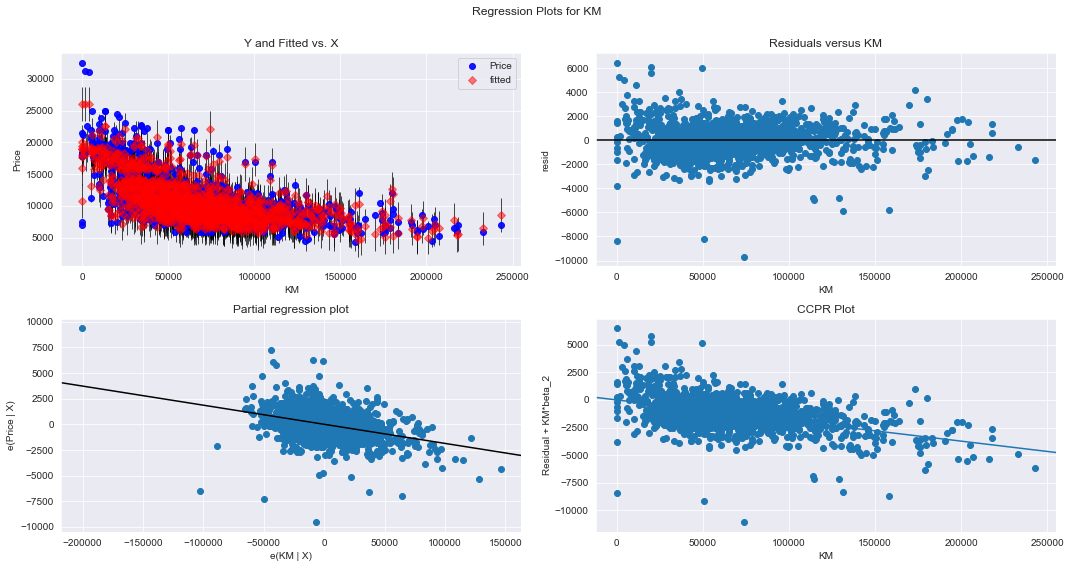

In [87]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

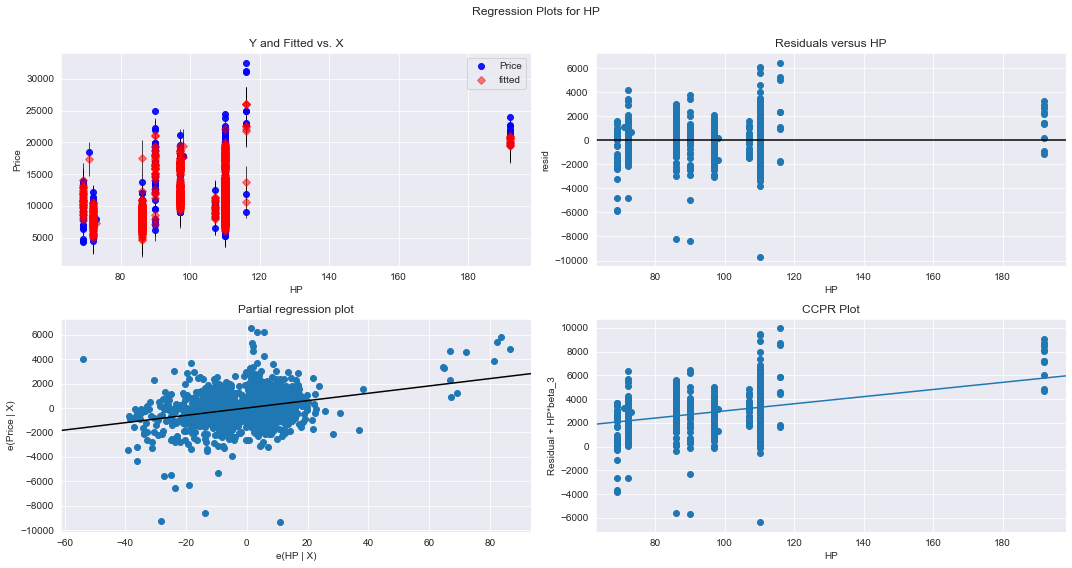

In [89]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

In [88]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

# predicting new data point 

In [94]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':5,"KM":40000,"HP":90,"cc":35,"Gears":5,"Quarterly_Tax":210,"Weight":0.124049},index=[1])

In [95]:
model.predict(new_data)

1   -36496.246613
dtype: float64

In [96]:
model.predict(df.iloc[0:5,])

0    16339.791765
1    15856.112623
2    16317.677399
3    15959.600529
4    15760.833530
dtype: float64

In [97]:
pred_y = model.predict(df)

In [98]:
pred_y

0       16339.791765
1       15856.112623
2       16317.677399
3       15959.600529
4       15760.833530
            ...     
1431     8820.741587
1432     8237.521447
1433     8394.930286
1434     8517.224813
1435    10768.846506
Length: 1436, dtype: float64